<a href="https://colab.research.google.com/github/rimanshu/ML_Learning/blob/master/spacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [11]:
doc = nlp(u'Tesla is looking for buying U.S based startup for $6 million')
for token in doc:
  print(token.text, token.pos, token.pos_, token.dep, token.dep_) # without _ will give numbers. 

Tesla 96 PROPN 429 nsubj
is 87 AUX 405 aux
looking 100 VERB 8206900633647566924 ROOT
for 85 ADP 443 prep
buying 100 VERB 438 pcomp
U.S 96 PROPN 416 dobj
based 100 VERB 402 amod
startup 92 NOUN 416 dobj
for 85 ADP 443 prep
$ 99 SYM 446 quantmod
6 93 NUM 7037928807040764755 compound
million 93 NUM 439 pobj


In [15]:
nlp.pipeline
nlp.pipe_names #['tagger', 'parser', 'ner']
#nlp.pipe_labels

['tagger', 'parser', 'ner']

In [17]:
type(doc)
type(doc[2:6]) # it is span

spacy.tokens.span.Span

In [0]:
 #This is my first colab aanotebook

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.widgets import *

In [0]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [0]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
# path = Config.data_path()/'image_downloader'
# files = download_google_images(path, 'cat', size='>1024*768', n_images=30)

# len(files)

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [0]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_65.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_27.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_86.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_83.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_148.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=64
                                  ).normalize(imagenet_stats)

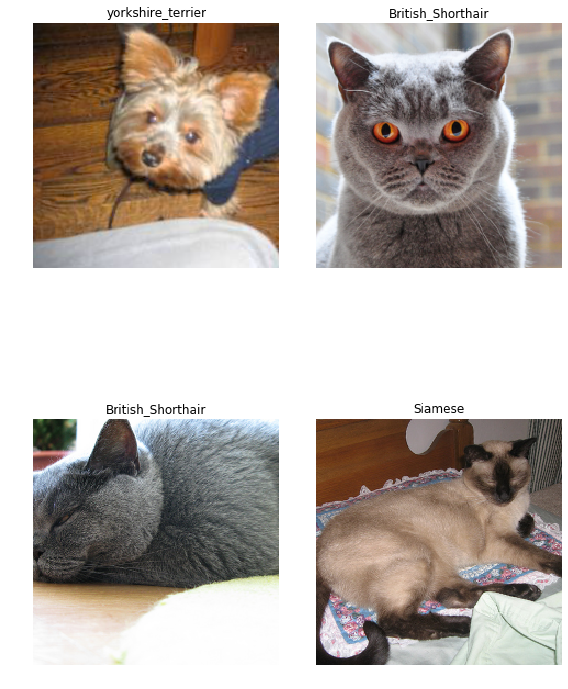

In [0]:
data.show_batch(rows=2, figsize=(8,12 ))

In [0]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [0]:
len(data.classes),data.c

(37, 37)

In [0]:
learn=cnn_learner(data,models.resnet101,metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth
100%|██████████| 178728960/178728960 [00:03<00:00, 57338560.29it/s]


In [0]:
# learn.model

In [0]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.866851,0.243771,0.926252,01:38
1,0.420959,0.183947,0.941813,01:36
2,0.239408,0.167727,0.950609,01:34
3,0.167817,0.146608,0.950609,01:35
4,0.123868,0.138504,0.958051,01:35


In [0]:
learn.save('stage-1')

In [0]:
interp=ClassificationInterpretation.from_learner(learn)
losses,idx=interp.top_losses()
len(data.valid_ds)==len(losses)==len(idx)

True

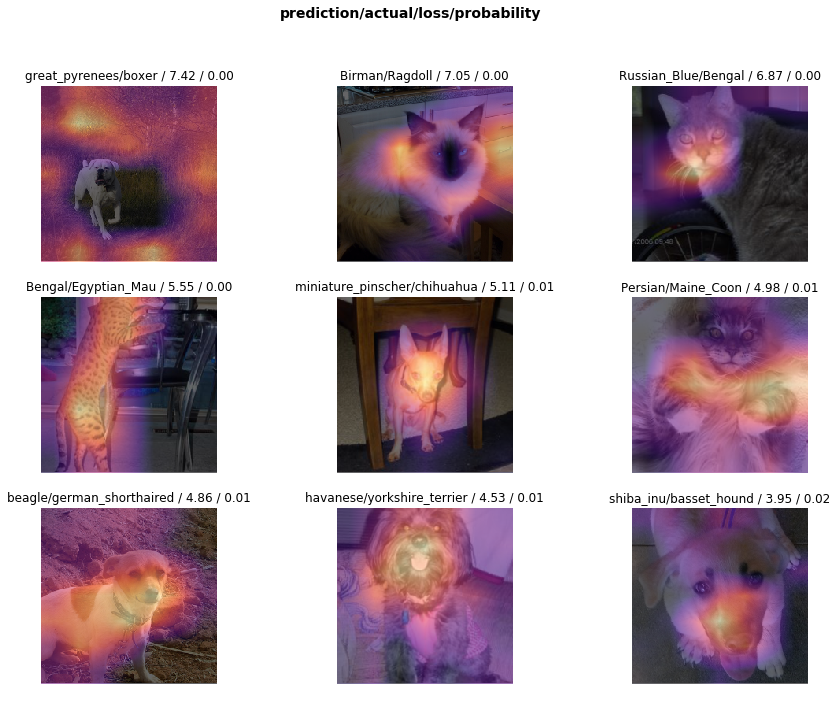

In [0]:
interp.plot_top_losses(9,figsize=(15,11))

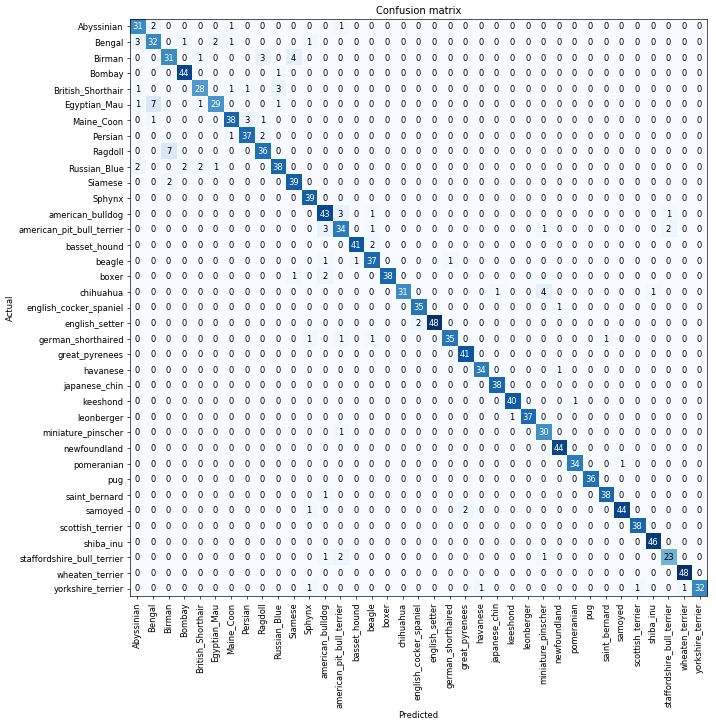

In [0]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [0]:
interp.most_confused(min_val=3)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('Ragdoll', 'Birman', 4)]

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time


Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
BrokenPipeError: [Errno 32] Broken pipe
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, b

KeyboardInterrupt: ignored